# SAN FRANCISCO AIRPORT CLUSTERING PROJECT

In [1]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer


In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.shape

(18885, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [10]:
df['Operating Airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines', inplace=True)
df["Operating Airline"].value_counts()

United Airlines                     3807
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
Delta Air Lines                      445
                                    ... 
World Airways                          3
Atlas Air, Inc                         2
Evergreen International Airlines       2
Xtra Airways                           2
Icelandair EHF                         2
Name: Operating Airline, Length: 83, dtype: int64

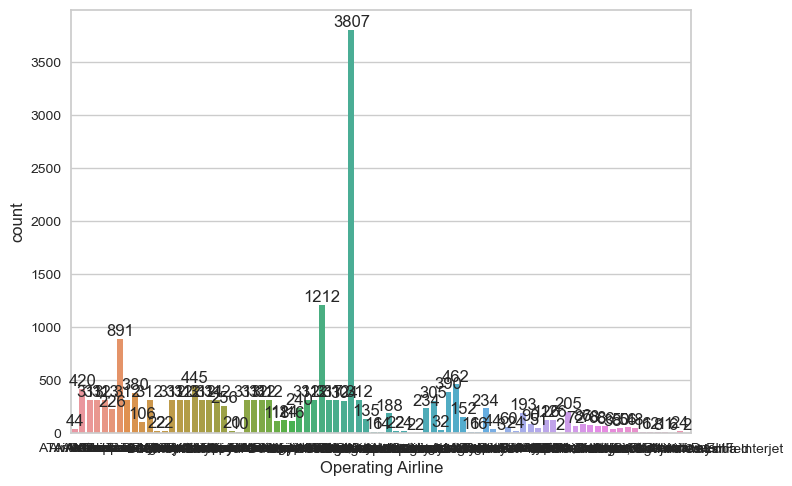

In [11]:
ax=sns.countplot(x=df["Operating Airline"])
ax.bar_label(ax.containers[0]);

In [12]:
alt_birimler = df['Operating Airline'].unique()
farkli_alt_birimler_sayisi = len(alt_birimler)
print(f"Farklı alt birim sayısı: {farkli_alt_birimler_sayisi}")

Farklı alt birim sayısı: 83


In [13]:
df['Published Airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines', inplace=True)
df["Published Airline"].value_counts()

United Airlines                     4649
Alaska Airlines                     1203
Delta Air Lines                      975
American Airlines                    588
Air Canada                           484
                                    ... 
World Airways                          3
Xtra Airways                           2
Atlas Air, Inc                         2
Evergreen International Airlines       2
Icelandair EHF                         2
Name: Published Airline, Length: 73, dtype: int64

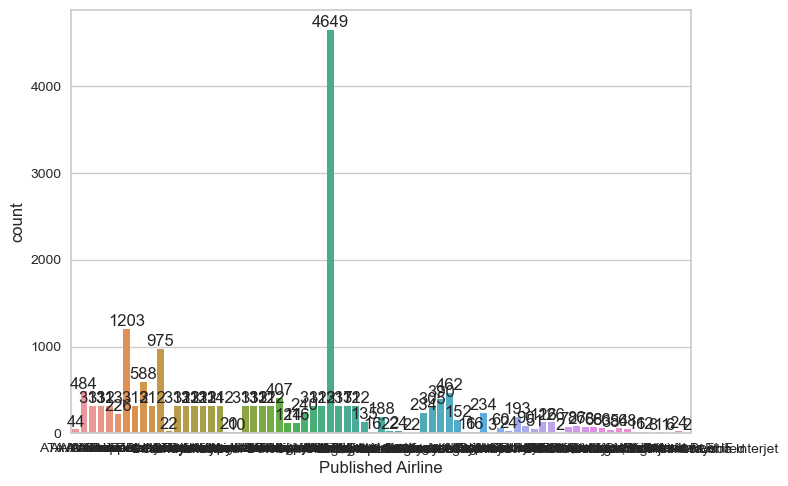

In [14]:
ax=sns.countplot(x=df["Published Airline"])
ax.bar_label(ax.containers[0]);

In [15]:
alt_birimler = df['Published Airline'].unique()
farkli_alt_birimler_sayisi = len(alt_birimler)
print(f"Farklı alt birim sayısı: {farkli_alt_birimler_sayisi}")

Farklı alt birim sayısı: 73


In [16]:
df["GEO Summary"].value_counts()

International    11884
Domestic          6938
Name: GEO Summary, dtype: int64

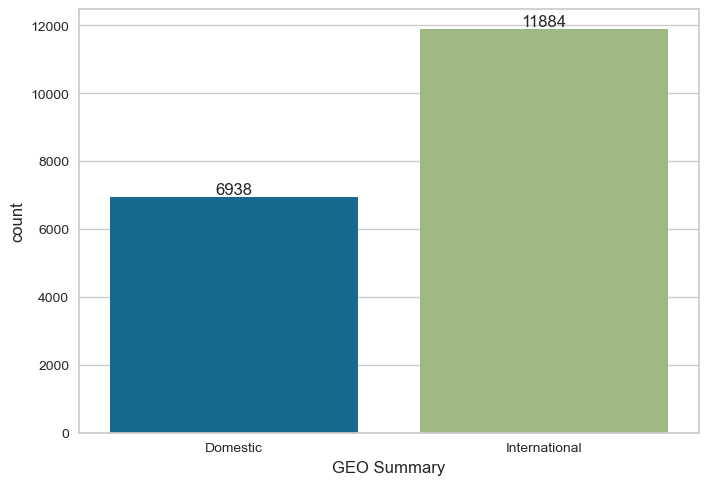

In [17]:
ax=sns.countplot(x=df["GEO Summary"])
ax.bar_label(ax.containers[0]);

In [18]:
df["GEO Region"].value_counts()

US                     6938
Asia                   4072
Europe                 2786
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         381
Middle East             354
South America            91
Name: GEO Region, dtype: int64

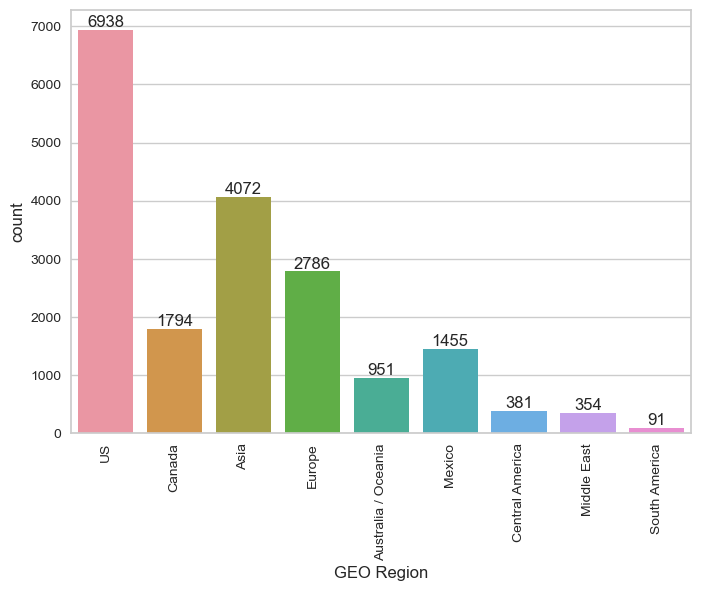

In [19]:
ax=sns.countplot(x=df["GEO Region"])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

In [20]:
df["Activity Type Code"].value_counts()

Enplaned          8901
Deplaned          8876
Thru / Transit    1045
Name: Activity Type Code, dtype: int64

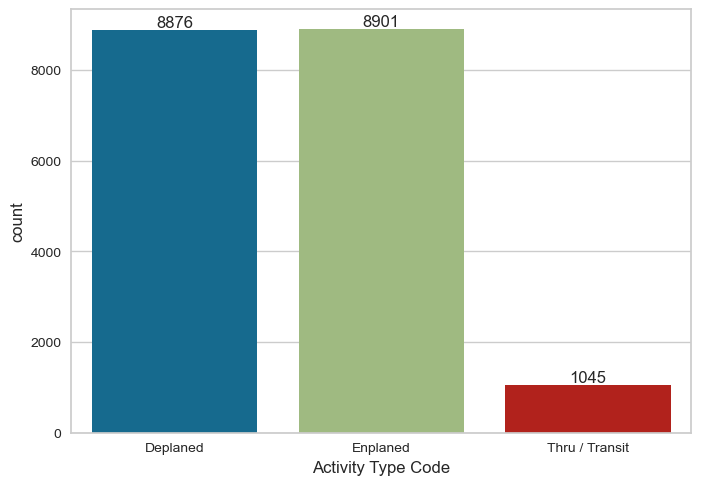

In [21]:
ax=sns.countplot(x=df["Activity Type Code"])
ax.bar_label(ax.containers[0]);

In [22]:
df["Price Category Code"].value_counts()

Other       16496
Low Fare     2326
Name: Price Category Code, dtype: int64

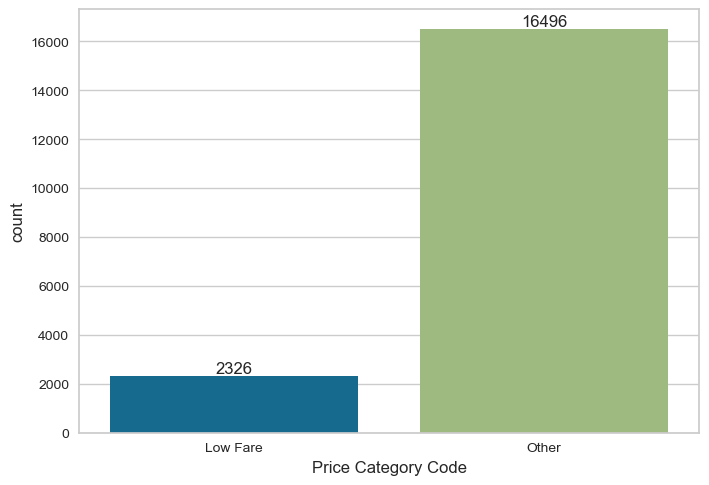

In [23]:
ax=sns.countplot(x=df["Price Category Code"])
ax.bar_label(ax.containers[0]);

In [24]:
df["Terminal"].value_counts()

International    11901
Terminal 1        3610
Terminal 3        2699
Terminal 2         586
Other               26
Name: Terminal, dtype: int64

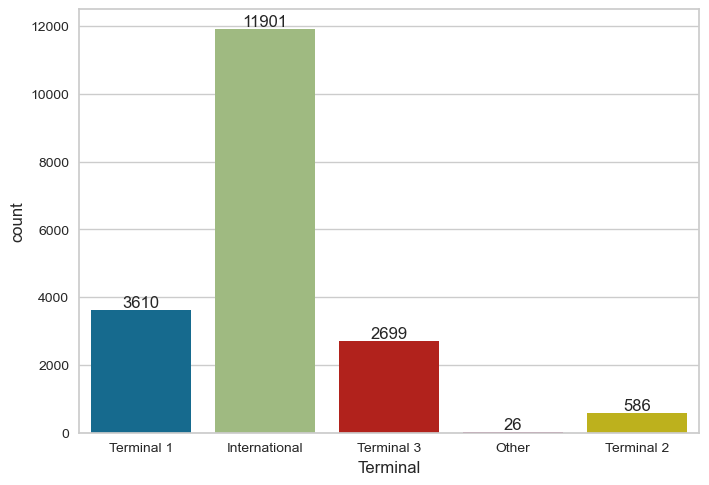

In [25]:
ax=sns.countplot(x=df["Terminal"])
ax.bar_label(ax.containers[0]);

In [26]:
df["Boarding Area"].value_counts()

A        6622
G        5299
B        2128
F        1682
C        1462
E        1017
D         586
Other      26
Name: Boarding Area, dtype: int64

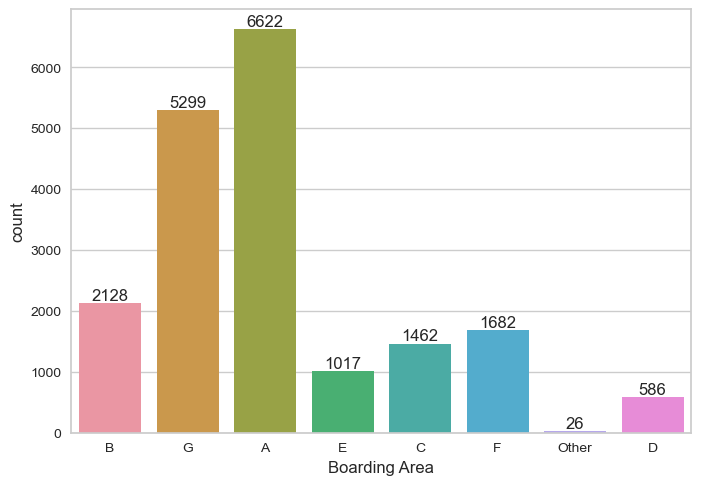

In [27]:
ax=sns.countplot(x=df["Boarding Area"])
ax.bar_label(ax.containers[0]);

In [28]:
df["Operating Airline IATA Code"].value_counts()

UA    3807
OO    1212
AS     891
VX     462
DL     445
      ... 
IB       6
WO       3
XP       2
5Y       2
EZ       2
Name: Operating Airline IATA Code, Length: 82, dtype: int64

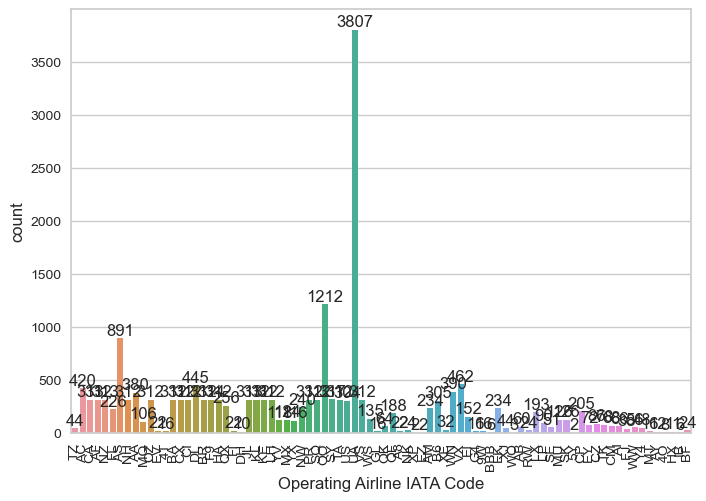

In [29]:
ax=sns.countplot(x=df["Operating Airline IATA Code"])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

In [30]:
alt_birimler = df['Operating Airline IATA Code'].unique()
farkli_alt_birimler_sayisi = len(alt_birimler)
print(f"Farklı alt birim sayısı: {farkli_alt_birimler_sayisi}")

Farklı alt birim sayısı: 82


In [31]:
df["Published Airline IATA Code"].value_counts()

UA     4649
AS     1203
DL      975
AA      588
AC      484
       ... 
BBB       6
WO        3
EZ        2
XP        2
5Y        2
Name: Published Airline IATA Code, Length: 73, dtype: int64

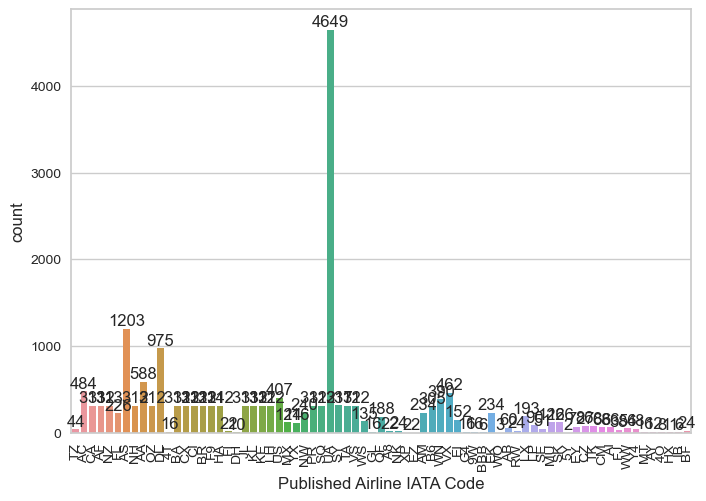

In [32]:
ax=sns.countplot(x=df["Published Airline IATA Code"])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

In [33]:
alt_birimler = df['Published Airline IATA Code'].unique()
farkli_alt_birimler_sayisi = len(alt_birimler)
print(f"Farklı alt birim sayısı: {farkli_alt_birimler_sayisi}")

Farklı alt birim sayısı: 73


In [34]:
alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Published Airline IATA Code'].unique()))}

# 'AltBirim' sütunundaki alt birimlere karşılık gelen sayısal değerleri atayalım
df['Published Airline IATA Code'] = df['Published Airline IATA Code'].map(alt_birim_atamalari)


In [35]:
df.head(50)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,62,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,62,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,62,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,8,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,8,International,Canada,Enplaned,Other,Terminal 1,B,34090
5,200507,Air China,CA,Air China,19,International,Asia,Deplaned,Other,International,G,6263
6,200507,Air China,CA,Air China,19,International,Asia,Enplaned,Other,International,G,5500
7,200507,Air France,AF,Air France,9,International,Europe,Deplaned,Other,International,A,12050
8,200507,Air France,AF,Air France,9,International,Europe,Enplaned,Other,International,A,11638
9,200507,Air New Zealand,NZ,Air New Zealand,51,International,Australia / Oceania,Deplaned,Other,International,G,4998


In [36]:
alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Operating Airline'].unique()))}

# 'AltBirim' sütunundaki alt birimlere karşılık gelen sayısal değerleri atayalım
df['Operating Airline'] = df['Operating Airline'].map(alt_birim_atamalari)




alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Operating Airline IATA Code'].unique()))}

# 'AltBirim' sütunundaki alt birimlere karşılık gelen sayısal değerleri atayalım
df['Operating Airline IATA Code'] = df['Operating Airline IATA Code'].map(alt_birim_atamalari)




alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Published Airline'].unique()))}

# 'AltBirim' sütunundaki alt birimlere karşılık gelen sayısal değerleri atayalım
df['Published Airline'] = df['Published Airline'].map(alt_birim_atamalari)







In [37]:
df.head(1)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,2,68,2,62,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271


In [38]:
dummy_df = pd.get_dummies(df["GEO Summary"], prefix="GEO Summary", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)


dummy_df = pd.get_dummies(df["GEO Region"], prefix="GEO Region", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)




dummy_df = pd.get_dummies(df["Activity Type Code"], prefix="Activity Type Code", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)



dummy_df = pd.get_dummies(df["Price Category Code"], prefix="Price Category Code", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)



dummy_df = pd.get_dummies(df["Terminal"], prefix="Terminal", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)


dummy_df = pd.get_dummies(df["Boarding Area"], prefix="Boarding Area", drop_first=True)

df = pd.concat([df, dummy_df], axis=1)



In [39]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other
0,200507,2,68,2,62,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,200507,2,68,2,62,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,200507,2,68,2,62,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
3,200507,6,8,6,8,International,Canada,Deplaned,Other,Terminal 1,B,35156,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
4,200507,6,8,6,8,International,Canada,Enplaned,Other,Terminal 1,B,34090,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0


In [40]:
column_names = df.columns.tolist()
formatted_column_names = ', '.join(f"'{col}'" for col in column_names)
print(formatted_column_names)

'Activity Period', 'Operating Airline', 'Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count', 'GEO Summary_International', 'GEO Region_Australia / Oceania', 'GEO Region_Canada', 'GEO Region_Central America', 'GEO Region_Europe', 'GEO Region_Mexico', 'GEO Region_Middle East', 'GEO Region_South America', 'GEO Region_US', 'Activity Type Code_Enplaned', 'Activity Type Code_Thru / Transit', 'Price Category Code_Other', 'Terminal_Other', 'Terminal_Terminal 1', 'Terminal_Terminal 2', 'Terminal_Terminal 3', 'Boarding Area_B', 'Boarding Area_C', 'Boarding Area_D', 'Boarding Area_E', 'Boarding Area_F', 'Boarding Area_G', 'Boarding Area_Other'


In [41]:
x=df[[
   'Activity Period', 'Operating Airline', 'Operating Airline IATA Code', 'Published Airline', 
    'Published Airline IATA Code', 
     'Passenger Count', 'GEO Summary_International', 'GEO Summary_International', 
    'GEO Region_Australia / Oceania', 'GEO Region_Canada', 'GEO Region_Central America', 'GEO Region_Europe', 
    'GEO Region_Mexico', 'GEO Region_Middle East', 'GEO Region_South America', 'GEO Region_US', 
    'Activity Type Code_Enplaned', 'Activity Type Code_Thru / Transit', 'Price Category Code_Other', 
    'Terminal_Other', 'Terminal_Terminal 1', 'Terminal_Terminal 2', 'Terminal_Terminal 3', 'Boarding Area_B',
    'Boarding Area_C', 
    'Boarding Area_D', 'Boarding Area_E', 'Boarding Area_F', 'Boarding Area_G', 'Boarding Area_Other' 
    
]]

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
model=KMeans(5)

In [67]:
model=model.fit(x)

In [68]:
tahmin=model.predict(x)

In [69]:
x["cluster"]=tahmin

In [70]:
silhouette_score(x,tahmin)

0.7836216499625936

In [71]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_  
        print("Cluster", i, "score", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [72]:
clust(10)

Cluster 2 score 0.8591896981664306
Cluster 3 score 0.827964185789846
Cluster 4 score 0.7853408755005215
Cluster 5 score 0.7835486051568362
Cluster 6 score 0.6570203155952284
Cluster 7 score 0.6593330951636711
Cluster 8 score 0.6431186823987977
Cluster 9 score 0.6373266507953828
Cluster 10 score 0.6082853734590891


In [73]:
x["cluster"].value_counts()

0    15256
3     1993
1     1110
4      237
2      226
Name: cluster, dtype: int64

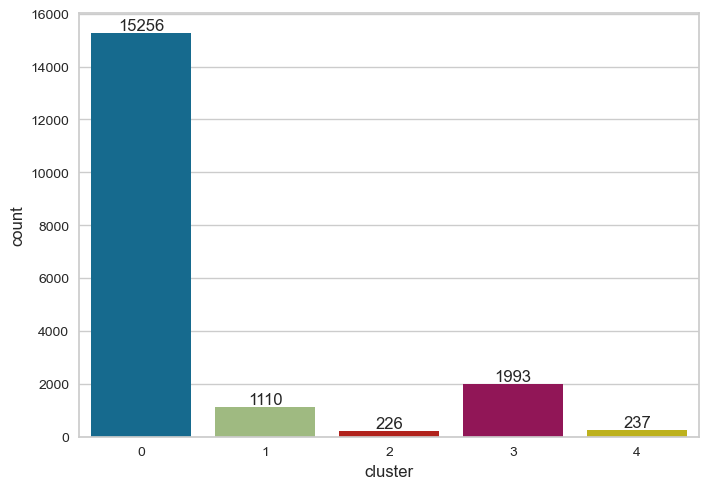

In [74]:
ax=sns.countplot(x=x["cluster"])
ax.bar_label(ax.containers[0]);

In [75]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [76]:
link_data=linkage(x,method="ward", metric="euclidean")

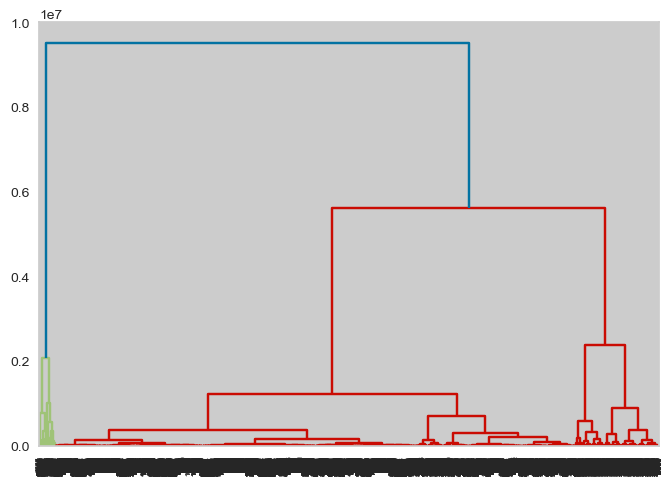

In [77]:
dendrogram(link_data)
plt.show()

In [78]:
from sklearn.cluster import DBSCAN

In [79]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [80]:
labels=model.labels_

In [81]:
from sklearn import metrics

In [82]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[clusters.core_sample_indices_]=True

In [83]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(x,labels))

0.7836216499625936


In [84]:
x["Operating Airline"]=df["Operating Airline"]

In [85]:
x[x["cluster"]==1]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,Passenger Count,GEO Summary_International,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,cluster
23,200507,17,6,16,6,166577,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
24,200507,17,6,16,6,160890,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
39,200507,31,26,27,25,97510,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
77,200507,66,55,65,63,103279,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
78,200507,66,55,65,63,102023,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18765,201806,31,26,27,25,201880,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
18827,201806,66,55,65,63,149286,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
18828,201806,66,55,65,63,153973,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
18832,201806,67,73,57,67,170911,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [86]:
x.groupby("cluster")["Operating Airline"].unique()

cluster
0    [2, 8, 9, 11, 13, 14, 15, 18, 20, 21, 23, 24, ...
1                             [17, 31, 66, 76, 67, 75]
2                                                 [75]
3    [6, 14, 31, 60, 74, 75, 66, 67, 76, 50, 17, 30...
4                                     [75, 76, 31, 14]
Name: Operating Airline, dtype: object

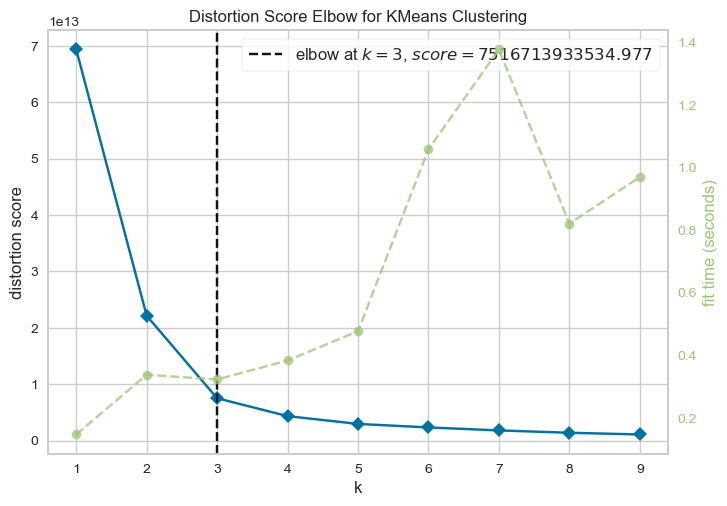

In [87]:
model = KMeans(random_state=42)

# Dirsek eğrisini çizmek için KElbowVisualizer kullanın
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(x)

# Dirsek eğrisini gösterin
visualizer.show()
plt.show()